# Photo-Ionization


Photoionization is the physical process in which an ion is formed from the interaction of a photon with an atom or molecule.

## 1. Ion production rate

The ion production rate is given by:

<br>
\begin{align}
 q_s(z,\lambda,\chi_0) = n_s(z) \sigma_s^i(\lambda) I(z,\lambda,\chi_0)\\
 \end{align}
<br>

where $\sigma_s^i$ is the ionization cross-section of species $s$ and as before, $I (z,\lambda,\chi_0)$ is the intensity at the altitude $z_0$ in the atmosphere, at a wavelength $\lambda$ and a solar zenith angle $\chi_0$ given by:

\begin{align}
 I (z,\lambda,\chi_0) = I_{\infty}\exp[-\tau (z,\lambda,\chi_0)]\\
 \end{align}
 
where $I_{\infty}$ represents the irradiance at "infinity" and $\tau$ __the optical depth__ which specifies the attenuation of the solar irradiance by the atmosphere given by:

<br>

\begin{align}
\tau (z_0,\lambda,\chi_0) = \sum_{s} \sigma_s^a(\lambda) \int_{z_0}^{\infty} n_s(z)\bigg[1-\bigg(\frac{R+z_0}{R+z}\bigg)^2 \sin^2\chi_0\bigg]^{-1/2}dz
\end{align}

where $\sigma_s^a$ represents the wavelength-dependent absorption cross section of a species $s$.

## Task #2


Plot the altitude z as a function of q$_s$ (ion production formula) <br>
For Ly-$\alpha$ include NO <br>
Choose lambda < 1000 <span>&#8491;</span> and the solar zenith angle ($\chi_0$), include O, O$_2$, N$_2$, N, H$_2$, H, He <br>
Then do for Mars, Venus, include CO, CO$_2$, O, O$_2$ <br>



## Solution 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds
from netCDF4 import Dataset
%pylab 
%matplotlib inline
pylab.rcParams['figure.figsize'] = (9, 7)

####################################
# Importing the different functions
###################################

from ionosphere_course import read_NRLMSIS
from ionosphere_course import read_TIMED
from ionosphere_course import Photo_Absorption
from ionosphere_course import IonProducRate
from plot import plt_axis
from functions import find_nearest


        

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib



-  From the Earth atmosphere model __[NRLMSISE-00 Atmosphere Model](https://ccmc.gsfc.nasa.gov/modelweb/models/nrlmsise00.php)__ we download the density profile for different species
-  From __[TIMED SEE Solar Spectral Irradiance](http://lasp.colorado.edu/lisird/data/timed_see_ssi_l3/)__ we get the solar irradiance. We choose __2012-01-14__, __Latitue=$ +41.25{^\circ}$__, __Longitude=$ +262.73{^\circ}$__, and __UT=12__.
-  From __[ NOAA ESRL Solar Position Calculator ](https://www.esrl.noaa.gov/gmd/grad/solcalc/azel.html)__ we find for the same above parameters, __the solar zenith angle $\chi_{0}=37{^\circ}$__.

<br>
In the following cells we read the different files and do the plottings


In [6]:
# Reading the NRLMSISE-00 file
df_NRL=read_NRLMSIS("nrlmsise_25485.lst", ["O","N2","O2","He", "H", "N"])
# Reading the TIMED SEE file 
df_TIMED=read_TIMED("timed_see_ssi_l3_2012.csv")
df_TIMED.index=df_TIMED.index*10 # wavelength from nm to Angstrom

lambda 1= : 8.16e-03
lambda 2= : 5.41e-04


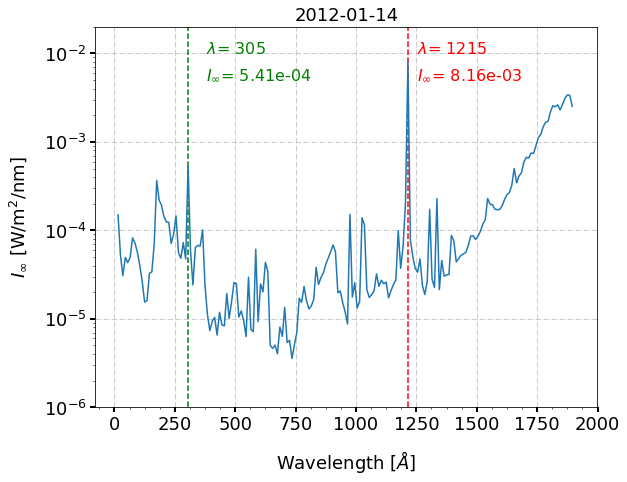

In [7]:
ax=plt.gca()
plt.plot(df_TIMED.index,df_TIMED["irradiance (W/m^2/nm)"])
plt.ylabel(r'$I_\infty$'  ' [W/m' r'$^{2}$/nm]')
plt.xlabel('Wavelength [$\AA$]')
plt.semilogy()
plt_axis(18, grid=True)
plt.ylim(1e-6, 2e-2)
plt.title('2012-01-14', fontsize=18)

##################################
#    CHOOSE THE WAVELENGTH
##################################
Lyalpha=1215
Lambda=305
##################################

Lya=find_nearest(df_TIMED.index,Lyalpha)
Lambda0=find_nearest(df_TIMED.index,Lambda)
plt.vlines(x=Lya, ymin=1e-6, ymax=2e-2, color='r', linestyles='--')
plt.vlines(x=Lambda0, ymin=1e-6, ymax=2e-2, color='g', linestyles='--')
plt.text(1252,1e-2, r'$\lambda$= '+str(Lyalpha), fontsize=16, color='r')
plt.text(1252,5e-3, r'$ I_{\infty}$= '+'%.2e' % df_TIMED["irradiance (W/m^2/nm)"][Lya], fontsize=16, color='r')
plt.text(378,1e-2, r'$\lambda$= '+str(Lambda), fontsize=16, color='g')
plt.text(378,5e-3, r'$ I_{\infty}$= '+ '%.2e' % df_TIMED["irradiance (W/m^2/nm)"][Lambda0], fontsize=16, color='g')

print('===============================')
print('lambda 1= :', '%.2e' % df_TIMED["irradiance (W/m^2/nm)"][Lya])
print('lambda 2= :', '%.2e' % df_TIMED["irradiance (W/m^2/nm)"][Lambda0])
print('===============================')

# EARTH

### 1. Absorption ($\sigma^a_s$) and ionization  ($\sigma^i_s$) cross-sections


#### *  $\lambda=1215$ <span>&#8491;</span> 

|              | $\text{O}$| $\text{N}_2$| $\text{O}_2$| $\text{He}$ | $\text{H}$|$\text{N}$|$\text{NO}$|
|--------------|-------|-------|-------|------------|-------|-------|-------|-------|
| $\sigma^a_s$ | $0$ | $0$ |  $113$ |  $0$|$0$|$0$|$1.24$|
| $\sigma^a_i$ | $0$|$0$|$0$|$0$|$0$|$0$|$1.24$|

<br>

#### *  $\lambda=305$ <span>&#8491;</span> 

|  |O| $\text{N}_2$| $\text{O}_2$|He|H|N|NO|CO|$\text{O}$|$\text{CO}_2$|
|--|-------|-------|-------|------------|-------|-------|-------|-------|-------|-------|-------|
| $\sigma^a_s$ | $8.69$ | $13.86$|$17.44$|$3.54$|$0.308$|$7.29$|N/A|$13.4$|$8.69$|$23.57$|
| $\sigma^a_i$ | $8.69$|$13.86$|$17.44$|$3.54$|$0.12$|$7.29$|N/A|$13.4$|$8.69$|$23.57$|


The ionization and absorbtion cross-sections are in units of $10^{-18} \text{cm}^{-2}$ <br>
For NO the values are taken from __[Watanabee et. al., PRE, 1953](https://journals.aps.org/pr/abstract/10.1103/PhysRev.91.1155)__ and the rest from  __[R. W. Schunk and A. F. Nagy, 2009](https://www.researchgate.net/publication/253827157_Ionospheres)__

In [4]:
nc_fid = Dataset("SCIAMACHY_NO_MLT_orbits_2012_v6.2.nc", 'r')
NO_density=nc_fid.variables['NO_NOEM'][10][10]
altitude=nc_fid.variables['altitude'][:]
df_NO=pds.DataFrame(NO_density,altitude, columns=["NO"])

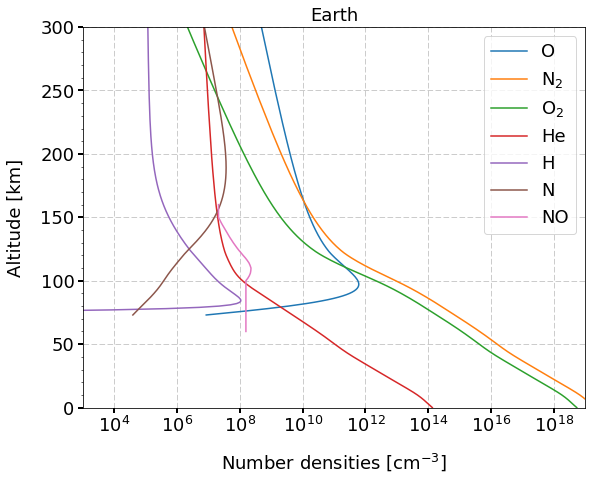

In [9]:
plt.plot(df_NRL["O"],df_NRL.index, label="O")
plt.plot(df_NRL["N2"],df_NRL.index, label='N'r'$_2$')
plt.plot(df_NRL["O2"],df_NRL.index,label='O'r'$_2$')
plt.plot(df_NRL["He"],df_NRL.index,label='He')
plt.plot(df_NRL["H"],df_NRL.index,label='H')
plt.plot(df_NRL["N"],df_NRL.index,label='N')
plt.plot(df_NO["NO"],df_NO.index,label='NO')
plt.ylabel('Altitude [km]')
plt.xlabel('Number densities [cm' r'$^{-3}]$')
plt.title("Earth")
plt.semilogx()
plt.xlim(1e3,1e19)
plt.ylim(0,300)

plt.legend(fontsize=18)
plt_axis(18, grid=True)

Wavelength= 1215 Angstrom
species=  NO // Absorption cross section= 1.24e-18 cm^2


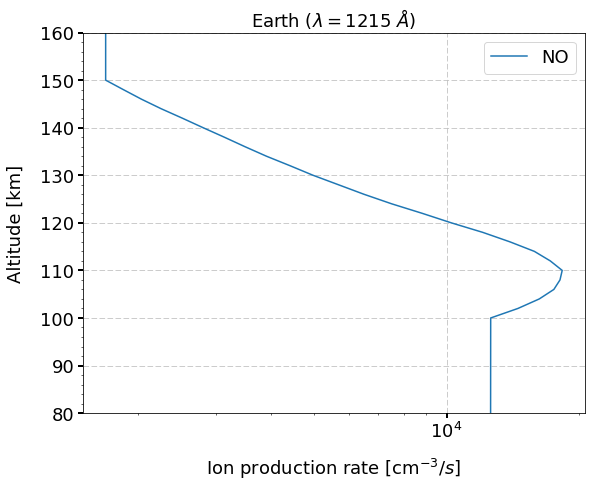

In [10]:
abs_cross=[1.24e-18]
ion_cross=[1.24e-18]
Iinf=8.8e-3
Wavelength= 1215 # Angstrom
sza=37

for j in np.arange(len(abs_cross)):    
    I=Photo_Absorption(df_NO,df_NO.index,1,abs_cross,Iinf, sza, Wavelength)
    qs=IonProducRate(df_NO["NO"],ion_cross,I,Wavelength)
    plt.plot(qs, df_NO.index, label="NO")
    plt.semilogx()
    plt.ylim(80, 160)
    plt.ylabel('Altitude [km]')
    plt.xlabel('Ion production rate [cm' r'$^{-3}/s]$')
    plt.title("Earth ("r'$\lambda=$'+"1215 $\AA$)")
    plt.legend(fontsize=18)
    plt_axis(18, grid=True)

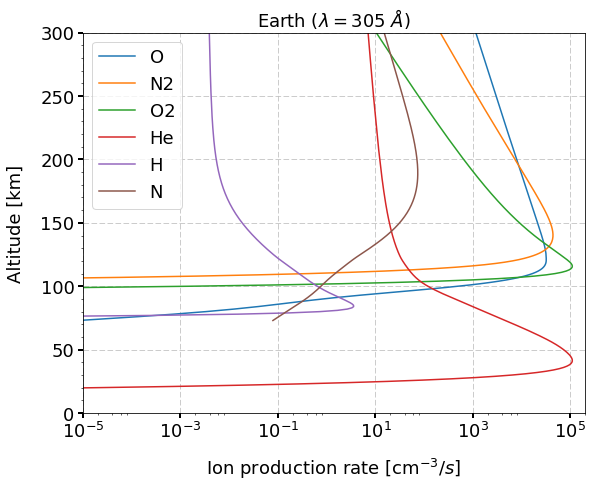

In [11]:
abs_cross=[8.69e-18,13.857e-18,17.438e-18,3.5437e-18,0.3077e-18,7.298e-18]
cross_ion=[8.69e-18,13.857e-18,17.438e-18,3.5437e-18,0.12e-18,7.298e-18]
Iinf=5.95e-4
Wavelength= 305 # Angstrom
sza=37

for j in np.arange(len(abs_cross)):    
    I=Photo_Absorption(df_NRL,df_NRL.index,1,abs_cross,Iinf, sza, Wavelength, j, species=True)
    qs=IonProducRate(df_NRL[df_NRL.columns[j]],cross_ion[j],I,Wavelength)
    plt.plot(qs, df_NRL.index, label=df_NRL.columns[j])
    plt.semilogx()
    plt.xlim(1e-5, 2e5)
    plt.ylim(0, 300)
    plt.title("Earth ("r'$\lambda=$'+"305 $\AA$)")
    plt.ylabel('Altitude [km]')
    plt.xlabel('Ion production rate [cm' r'$^{-3}/s]$')
    plt.legend(fontsize=18)
    plt_axis(18, grid=True)

# Other planets

We have to scale the solar irradiance depending on the planet in question. Ths solar irradiance at Earth is given by:

\begin{align}
 I_E = \frac{R_{\odot}^2}{D_E^{2}}I_{\odot}\\
 \end{align}
 
where $R_{\odot}$ is the radius of the sun in meters, $I_{\odot}$ is the power density at the sun's surface (in W/m$^2$) as determined by Stefan-Boltzmann's blackbody equation, and  $D_{E}$ is the distance of Earth from the sun. As a consequence, assuming a uniform spatial distribution of the irradiance wavelength spectrum at any planet $P$ we get:


\begin{align}
 I_P = \bigg(\frac{D_{E}}{D_P}\bigg)^2I_{E}\\
 \end{align}

Venus: $D_V$= 0.72 AU<br>
Mars: $D_M$= 1.52 AU <br>

## VENUS


The composition profiles of CO$_2$, CO and O of Venus atmopshere are taken from: __[Hedin et. al., JGR, 1983](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JA088iA01p00073)__ (table 3a)
<br>
For O$_2$, the profiles is taken from __[Krasnopolsky and Parshev, Nature, 1980](https://www.nature.com/articles/292610a0)__ (Figure 1).



In [12]:
df_Venus0=pds.read_csv("Venus_model.txt", header=0, sep="\t")

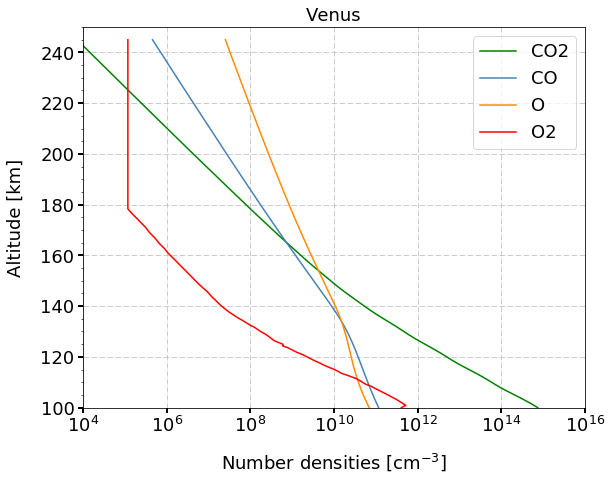

In [13]:
plt.plot(df_Venus0['CO2'],df_Venus0['alt'], label="CO2", color="green")
plt.plot(df_Venus0['CO'],df_Venus0['alt'], label="CO", color='steelblue')
plt.plot(df_Venus0['O'],df_Venus0['alt'], label="O", color='darkorange')
plt.plot(df_Venus0['O2'],df_Venus0['alt'], label="O2", color="red")
plt.ylabel('Altitude [km]')
plt.xlabel('Number densities [cm' r'$^{-3}]$')
plt.title("Venus")
plt.semilogx()
plt.ylim(100,250)
plt.xlim(1e4,1e16)
plt.legend(fontsize=18)
plt_axis(18, grid=True)

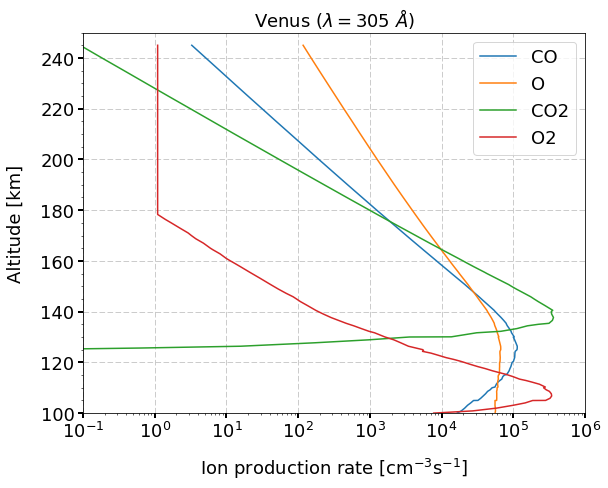

In [14]:
abs_cross=[13.441e-18,8.693e-18,23.574e-18,17.43e-18]
cross_ion=[13.441e-18,8.693e-18,23.629e-18,17.43e-18]
Iinf=5.95e-4/(0.723**2)
Wavelength=305
sza=37
df_Venus=df_Venus0[df_Venus0.columns[[1,2,3,6]]]

for j in np.arange(len(abs_cross)):    
    I=Photo_Absorption(df_Venus,df_Venus0.index,5,abs_cross,Iinf, sza, Wavelength, j, species=True)
    qs=IonProducRate(df_Venus[df_Venus.columns[j]],cross_ion[j],I,Wavelength)
    plt.plot(qs, df_Venus0["alt"], label=df_Venus.columns[j])
    plt.semilogx()
    plt.xlim(0.1, 1e6)
    plt.ylim(100, 250)
    plt.ylabel('Altitude [km]')
    plt.xlabel('Ion production rate [cm' r'$^{-3}$s'r'$^{-1}$]')
    plt.title("Venus ("r'$\lambda=$'+"305 $\AA$)")
    plt.legend(fontsize=18)
    plt_axis(18, grid=True)


## MARS

For Mars, the composition profiles are taken from For NO the values are taken from  __[R. W. Schunk and A. F. Nagy, 2009](https://www.researchgate.net/publication/253827157_Ionospheres)__ Chapter 2, section 2.4.3, Figure 2.22.<br>
Data can be extracted as well from __[Nier and McElroy, JGR, 1977](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JS082i028p04341)__  Figure 4

In [15]:
df_Mars=pds.read_csv("Mars_model.txt", sep="\t")


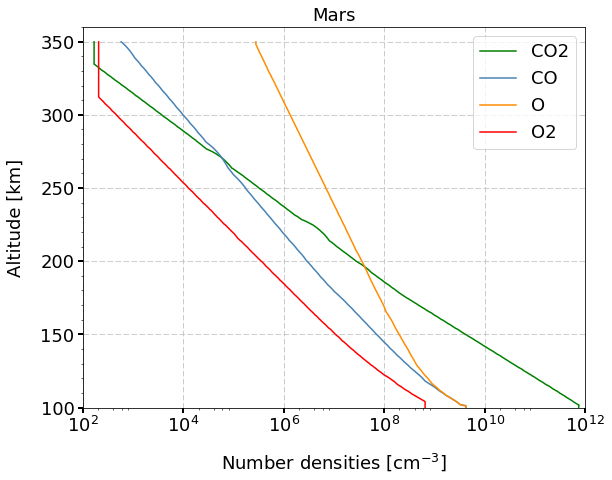

In [16]:
plt.plot(df_Mars['CO2'],df_Mars['alt'], label="CO2", color="green")
plt.plot(df_Mars['CO'],df_Mars['alt'], label="CO", color='steelblue')
plt.plot(df_Mars['O'],df_Mars['alt'], label="O", color='darkorange')
plt.plot(df_Mars['O2'],df_Mars['alt'], label="O2", color="red")
plt.ylabel('Altitude [km]')
plt.xlabel('Number densities [cm' r'$^{-3}]$')
plt.title("Mars")
plt.semilogx()
plt.ylim(100,360)
plt.xlim(1e2,1e12)
plt.legend(fontsize=18)
plt_axis(18, grid=True)

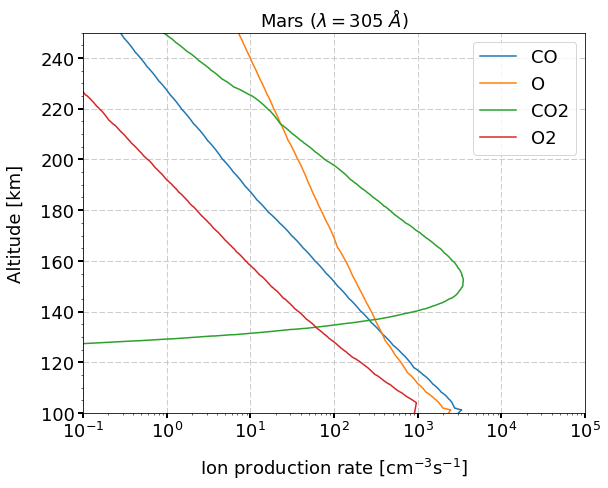

In [19]:
abs_cross=[13.441e-18,8.693e-18,23.574e-18,13.857e-18]
cross_ion=[13.441e-18,8.693e-18,23.574e-18,13.857e-18]
Iinf=5.95e-4/(1.52**2)
wavelength=305
sza=37
df_col=df_Mars[df_Mars.columns[2:6]]


for j in np.arange(len(abs_cross)):    
    I=Photo_Absorption(df_col,df_Mars.index,0.1,abs_cross,Iinf, sza, wavelength, j, species=True)
    qs=IonProducRate(df_col[df_col.columns[j]],cross_ion[j],I,Wavelength)
    plt.plot(qs, df_Mars['alt'], label=df_col.columns[j])
    plt.xlim(0.1, 1e5)
    plt.ylim(100, 250)
    plt.ylabel('Altitude [km]')
    plt.xlabel('Ion production rate [cm' r'$^{-3}$s'r'$^{-1}$]')
    plt.title("Mars ("r'$\lambda=$'+"305 $\AA$)")
    plt.semilogx()
    plt.legend(fontsize=18)
    plt_axis(18, grid=True)